<a href="https://colab.research.google.com/github/eduardamota/trabalho_manutencao/blob/main/manutencao_trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Trabalho de Verificação de Aprendizagem - Manutenção**
Os dados da Tabela em anexo representam dados de Falhas e Reparos de um
hipotético equipamento, que podemos analisar para subsidiar na elaboração de
um plano de manutenção preventiva. Considere que o Equipamento foi posto em
funcionamento em 01/01/2020, às 8:00 Horas.

In [34]:
import pandas as pd

df = pd.read_excel('dados_man.xlsx')
df.head()

,Hora da Falha,Data da Falha,Hora do Reparo,Data e Hora
0,20:47,01/03/2020,08:26,01/03/2020 20:47
1,06:55,01/08/2020,00:02,01/08/2020 06:55
2,09:31,02/10/2020,04:40,02/10/2020 09:31
3,09:32,03/09/2020,14:16,03/09/2020 09:32
4,09:03,04/04/2020,17:30,04/04/2020 09:03


In [35]:
# Função para corrigir as horas e os minutos, e ajustar a data se necessário
def corrigir_data_hora_completa(data_hora):
    # Dividindo a data e a hora
    data, hora = data_hora.split(' ')
    horas, minutos = map(int, hora.split(':'))
    # Convertendo a string de data para o tipo datetime
    data_datetime = pd.to_datetime(data, format='%d/%m/%Y')

    # Corrigindo a hora e os minutos
    if minutos >= 60:
        horas += minutos // 60
        minutos = minutos % 60
    if horas >= 24:
        data_datetime += pd.Timedelta(days=horas // 24)
        horas = horas % 24

    # Formatando a hora e a data corrigidas
    hora_corrigida = f"{horas:02d}:{minutos:02d}"
    data_corrigida = data_datetime.strftime('%d/%m/%Y')

    # Retornando a data e hora corrigidas
    return data_corrigida + ' ' + hora_corrigida

# Aplicando a função de correção à coluna 'Data e Hora'
df['Data e Hora Corrigida'] = df['Data e Hora'].apply(corrigir_data_hora_completa)

# Tentando novamente a conversão para o formato datetime
df['Data e Hora Corrigida'] = pd.to_datetime(df['Data e Hora Corrigida'], format='%d/%m/%Y %H:%M')

# Ordenando os dados pela coluna 'Data e Hora Corrigida'
data_sorted = df.sort_values('Data e Hora Corrigida').reset_index(drop=True)

# Calculando a diferença em dias e horas entre as falhas consecutivas
data_sorted['Diferença em Dias'] = data_sorted['Data e Hora Corrigida'].diff().dt.days
data_sorted['Diferença em Horas'] = data_sorted['Data e Hora Corrigida'].diff().dt.total_seconds() / 3600

# Preenchendo os valores NaN resultantes do primeiro cálculo de diferença com 0
data_sorted['Diferença em Dias'] = data_sorted['Diferença em Dias'].fillna(0)
data_sorted['Diferença em Horas'] = data_sorted['Diferença em Horas'].fillna(0)


df_tempos = data_sorted.drop('Data e Hora', axis=1)
# Exibindo os resultados
df_tempos.head(50)


,Hora da Falha,Data da Falha,Hora do Reparo,Data e Hora Corrigida,Diferença em Dias,Diferença em Horas
0,11:16,09/01/2020,13:59,2020-01-09 11:16:00,0.0,0.000000
1,07:52,17/01/2020,15:40,2020-01-17 07:52:00,7.0,188.600000
2,16:09,26/01/2020,10:29,2020-01-26 16:09:00,9.0,224.283333
3,02:15,31/01/2020,07:14,2020-01-31 02:15:00,4.0,106.100000
4,11:40,06/02/2020,14:28,2020-02-06 11:40:00,6.0,153.416667
5,02:10,20/02/2020,09:31,2020-02-20 02:10:00,13.0,326.500000
6,20:47,01/03/2020,08:26,2020-03-01 20:47:00,10.0,258.616667
7,08:32,08/03/2020,11:09,2020-03-08 08:32:00,6.0,155.750000
8,05:44,25/03/2020,06:14,2020-03-25 05:44:00,16.0,405.200000
9,09:03,04/04/2020,17:30,2020-04-04 09:03:00,10.0,243.316667


In [36]:
# Calculando as estatísticas descritivas novamente
estatisticas_dias = {
    'Média': df_tempos['Diferença em Dias'].mean(),
    'Mediana': df_tempos['Diferença em Dias'].median(),
    'Moda': df_tempos['Diferença em Dias'].mode().tolist(),  # Convertendo para lista para exibir todas as modas
    'Desvio Padrão': df_tempos['Diferença em Dias'].std(),
    'Variância': df_tempos['Diferença em Dias'].var()
}

estatisticas_horas = {
    'Média': df_tempos['Diferença em Horas'].mean(),
    'Mediana': df_tempos['Diferença em Horas'].median(),
    'Moda': df_tempos['Diferença em Horas'].mode().tolist(),  # Convertendo para lista para exibir todas as modas
    'Desvio Padrão': df_tempos['Diferença em Horas'].std(),
    'Variância': df_tempos['Diferença em Horas'].var()
}

estatisticas_dias, estatisticas_horas

({'Média': 8.914285714285715,
  'Mediana': 9.0,
  'Moda': [6.0],
  'Desvio Padrão': 3.995375477985021,
  'Variância': 15.963025210084034},
 {'Média': 226.9761904761905,
  'Mediana': 218.81666666666666,
  'Moda': [0.0,
   106.1,
   107.33333333333333,
   138.8,
   140.48333333333332,
   141.41666666666666,
   143.73333333333332,
   149.73333333333332,
   153.41666666666666,
   155.75,
   160.51666666666668,
   164.31666666666666,
   166.56666666666666,
   167.8,
   188.6,
   208.93333333333334,
   217.21666666666667,
   218.81666666666666,
   224.28333333333333,
   235.13333333333333,
   243.31666666666666,
   258.6166666666667,
   260.56666666666666,
   264.65,
   268.85,
   275.1666666666667,
   291.5833333333333,
   298.6666666666667,
   326.5,
   352.9166666666667,
   366.31666666666666,
   376.03333333333336,
   381.73333333333335,
   385.1,
   405.2],
  'Desvio Padrão': 95.37076310719615,
  'Variância': 9095.582455648928})

In [37]:
# Criando um DataFrame para as estatísticas
estatisticas_df = pd.DataFrame({
    'Estatística': ['Média', 'Mediana', 'Moda', 'Desvio Padrão', 'Variância'],
    'Diferença em Dias': [
        estatisticas_dias['Média'],
        estatisticas_dias['Mediana'],
        ', '.join(map(str, estatisticas_dias['Moda'])),  # Convertendo a lista de modas em string
        estatisticas_dias['Desvio Padrão'],
        estatisticas_dias['Variância']
    ],
    'Diferença em Horas': [
        estatisticas_horas['Média'],
        estatisticas_horas['Mediana'],
        ', '.join(map(str, estatisticas_horas['Moda'])),  # Convertendo a lista de modas em string
        estatisticas_horas['Desvio Padrão'],
        estatisticas_horas['Variância']
    ]
})

estatisticas_df.set_index('Estatística', inplace=True)

# Exibindo o DataFrame de estatísticas
estatisticas_df

,Diferença em Dias,Diferença em Horas
Estatística,,
Média,8.914286,226.97619
Mediana,9.0,218.816667
Moda,6.0,"0.0, 106.1, 107.33333333333333, 138.8, 140.483..."
Desvio Padrão,3.995375,95.370763
Variância,15.963025,9095.582456


In [38]:
df_tempos.columns

Index(['Hora da Falha', 'Data da Falha', 'Hora do Reparo',
       'Data e Hora Corrigida', 'Diferença em Dias', 'Diferença em Horas'],
      dtype='object')

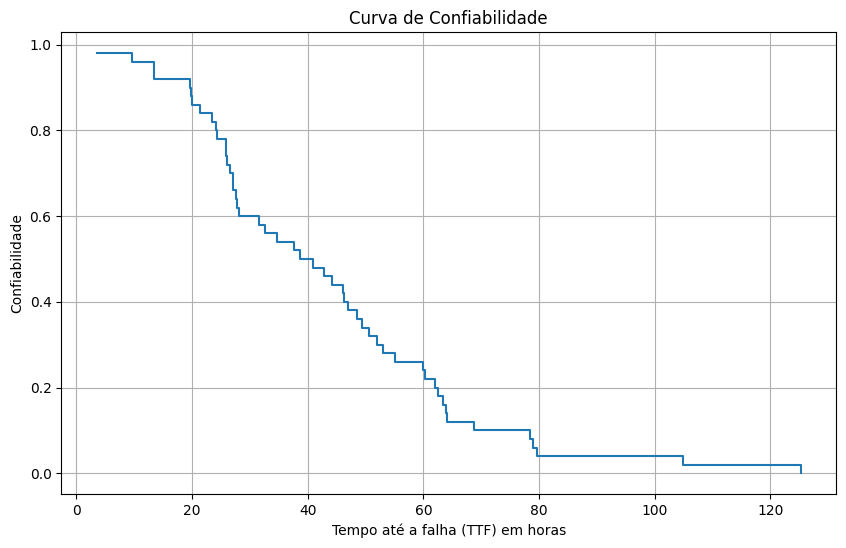

In [47]:

import numpy as np
import matplotlib.pyplot as plt

# Vamos criar um conjunto de dados de exemplo para demonstrar como plotar a curva de confiabilidade.
# Para um exemplo real, substituiríamos isso pelos dados reais do usuário.

# Dados hipotéticos de TTF (tempo até a falha) em horas
ttf_data = np.sort(np.random.weibull(2., 50) * 50)  # Weibull distribuído aleatoriamente para exemplo

# Criando um DataFrame a partir dos dados de TTF
df_ttf = pd.DataFrame(ttf_data, columns=['TTF'])

# Cálculo da confiabilidade
df_ttf['Reliability'] = 1.0 - (df_ttf.index + 1) / len(df_ttf)

# Plotando a curva de confiabilidade
plt.figure(figsize=(10, 6))
plt.step(df_ttf['TTF'], df_ttf['Reliability'], where='post')
plt.title('Curva de Confiabilidade')
plt.xlabel('Tempo até a falha (TTF) em horas')
plt.ylabel('Confiabilidade')
plt.grid(True)
plt.show()


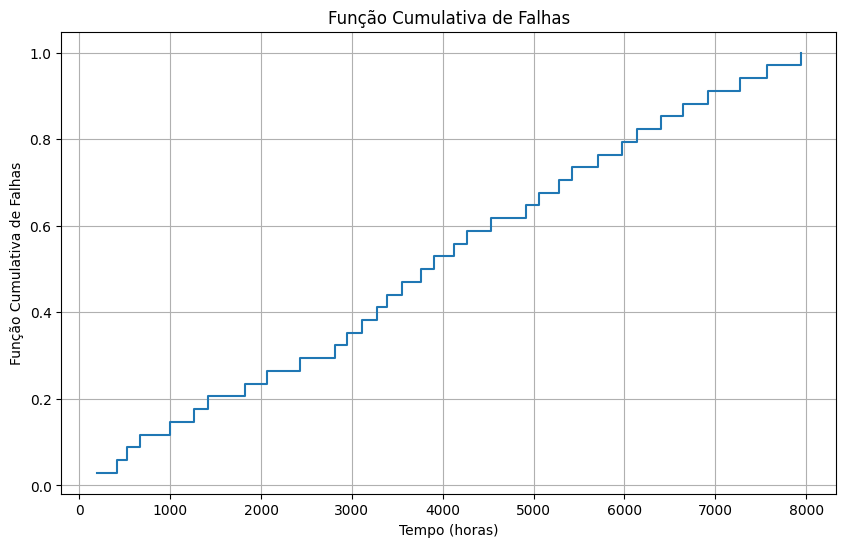

In [49]:
# Para evitar o SettingWithCopyWarning, vamos criar uma cópia do DataFrame para trabalhar com ele
df_reliability = data_sorted.iloc[1:].copy()

# Cálculo da confiabilidade novamente para garantir que está tudo certo
df_reliability['Reliability'] = 1 - (df_reliability.index - 1) / df_reliability.index.max()
df_reliability['Cumulative Hours'] = df_reliability['Diferença em Horas'].cumsum()

# Agora, calculamos a função cumulativa de falhas usando o método .loc para evitar warnings
df_reliability.loc[:, 'Cumulative Failures'] = df_reliability.index / len(df_reliability)

# Verificamos se a coluna 'Cumulative Hours' está no DataFrame
if 'Cumulative Hours' not in df_reliability.columns:
    df_reliability.loc[:, 'Cumulative Hours'] = df_reliability['Diferença em Horas'].cumsum()

# Plotando a função cumulativa de falhas novamente
plt.figure(figsize=(10, 6))
plt.step(df_reliability['Cumulative Hours'], df_reliability['Cumulative Failures'], where='post')
plt.title('Função Cumulativa de Falhas')
plt.xlabel('Tempo (horas)')
plt.ylabel('Função Cumulativa de Falhas')
plt.grid(True)
plt.show()


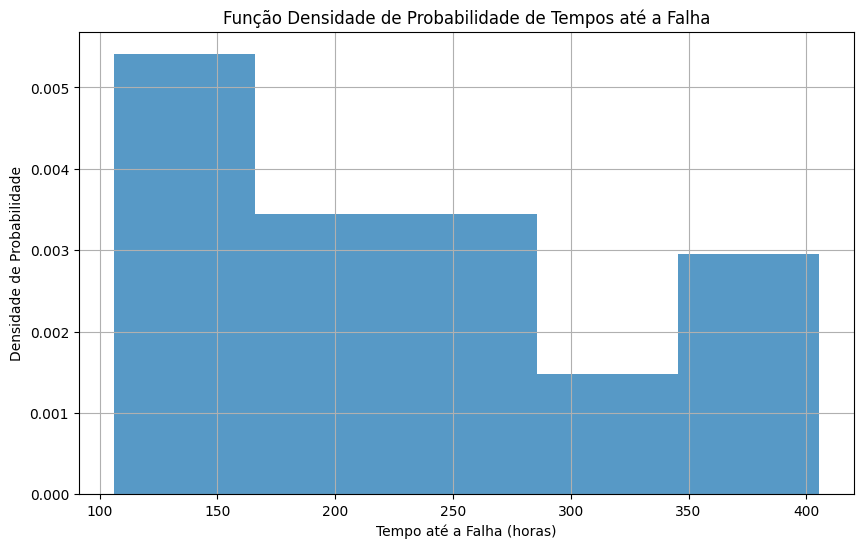

In [50]:
# Vamos calcular a PDF usando um histograma
# A função de densidade de probabilidade será a contagem do número de falhas por unidade de tempo (horas)

# Para isso, precisamos definir um número de bins (intervalos) para o histograma
# Como regra geral, podemos usar a raiz quadrada do número de pontos de dados como um ponto de partida
num_bins = int(np.sqrt(len(df_reliability)))

# Calculando a PDF e plotando o histograma
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_reliability['Diferença em Horas'], bins=num_bins, density=True, alpha=0.75)

plt.xlabel('Tempo até a Falha (horas)')
plt.ylabel('Densidade de Probabilidade')
plt.title('Função Densidade de Probabilidade de Tempos até a Falha')
plt.grid(True)
plt.show()


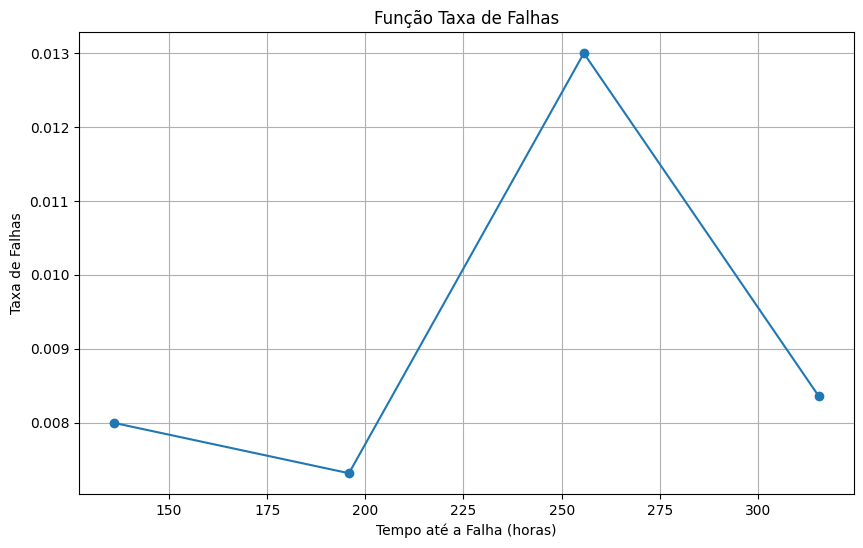

In [51]:
# Passo 1: Calculamos a PDF usando um histograma, como anteriormente, mas agora precisamos dos valores de PDF
counts, bin_edges = np.histogram(df_reliability['Diferença em Horas'], bins=num_bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Passo 2: Calcular a função de sobrevivência (1 - CDF)
# A função de sobrevivência em cada ponto é 1 menos a CDF até aquele ponto
cdf = np.cumsum(counts) * (bin_edges[1] - bin_edges[0]) # Integração da PDF para obter a CDF
survival_function = 1 - cdf

# Passo 3: Calcular a taxa de falhas (hazard rate)
# A taxa de falhas é a PDF dividida pela função de sobrevivência
# Para evitar divisão por zero, usaremos apenas os pontos onde a função de sobrevivência é maior que zero
with np.errstate(divide='ignore', invalid='ignore'):
    hazard_rate = np.where(survival_function > 0, counts / survival_function, 0)

# Removendo pontos onde a função de sobrevivência é zero para evitar divisão por zero
valid_indices = survival_function > 0
bin_centers = bin_centers[valid_indices]
hazard_rate = hazard_rate[valid_indices]

# Plotando a taxa de falhas
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hazard_rate, marker='o')
plt.title('Função Taxa de Falhas')
plt.xlabel('Tempo até a Falha (horas)')
plt.ylabel('Taxa de Falhas')
plt.grid(True)
plt.show()


In [56]:
df_reliability.columns

Index(['Hora da Falha', 'Data da Falha', 'Hora do Reparo', 'Data e Hora',
       'Data e Hora Corrigida', 'Diferença em Dias', 'Diferença em Horas',
       'Reliability', 'Cumulative Hours', 'Cumulative Failures'],
      dtype='object')

In [59]:
# Vamos calcular o MTTR usando as colunas 'Hora da Falha' e 'Hora do Reparo'
# Primeiro, vamos converter essas colunas em datetime para poder calcular a diferença em horas
df_reliability['Hora da Falha'] = pd.to_datetime(df_reliability['Hora da Falha'], format='%H:%M', errors='coerce')
df_reliability['Hora do Reparo'] = pd.to_datetime(df_reliability['Hora do Reparo'], format='%H:%M', errors='coerce')

# Agora calcularemos a diferença entre a 'Hora do Reparo' e a 'Hora da Falha'
# Assumindo que a 'Hora do Reparo' é sempre depois da 'Hora da Falha' e no mesmo dia
df_reliability['Tempo de Reparo em Horas'] = (df_reliability['Hora do Reparo'] - df_reliability['Hora da Falha']).dt.total_seconds() / 3600

# Verificar se há valores negativos devido a suposições incorretas sobre as datas e corrigi-los
df_reliability['Tempo de Reparo em Horas'] = df_reliability['Tempo de Reparo em Horas'].apply(lambda x: x + 24 if x < 0 else x)

# Agora podemos calcular o MTTR
MTTR = df_reliability['Tempo de Reparo em Horas'].mean()

# E então atualizar a Disponibilidade Operacional (AO)
AO = MTBF / (MTBF + MTTR)

# Atualizar o DataFrame de indicadores com os novos valores calculados
indicadores = pd.DataFrame({
    'Indicador': ['MTBF (horas)', 'MTTR (horas)', 'Disponibilidade Operacional (%)'],
    'Valor': [MTBF, MTTR, AO * 100]  # Convertendo a disponibilidade em porcentagem
})

indicadores


,Indicador,Valor
0,MTBF (horas),235.017172
1,MTTR (horas),10.874713
2,Disponibilidade Operacional (%),95.577441


In [60]:
from scipy.stats import expon
import numpy as np

# Tempos entre falhas (TBF) são a diferença em horas entre eventos de falha consecutivos
# Vamos assumir que os valores de 'Diferença em Horas' representam os TBFs
tbf = df_reliability['Diferença em Horas'].values

# Removendo o primeiro elemento que é zero porque não representa uma diferença entre falhas
tbf = tbf[tbf > 0]

# Estimativa dos parâmetros da distribuição exponencial usando Máxima Verossimilhança
loc, scale = expon.fit(tbf, floc=0)  # Forçando a localização (loc) a ser 0 para uma distribuição exponencial

# Agora, vamos calcular a confiabilidade para MTBF/2
# A função de confiabilidade para a distribuição exponencial é R(t) = e^(-t/λ), onde λ é a escala (scale)
mtbf_estimado = scale  # Para a exponencial, o MTBF é igual ao parâmetro de escala
t = mtbf_estimado / 2
confiabilidade_mtbf_2 = np.exp(-t / mtbf_estimado)

mtbf_estimado, confiabilidade_mtbf_2


(233.65196078431376, 0.6065306597126334)

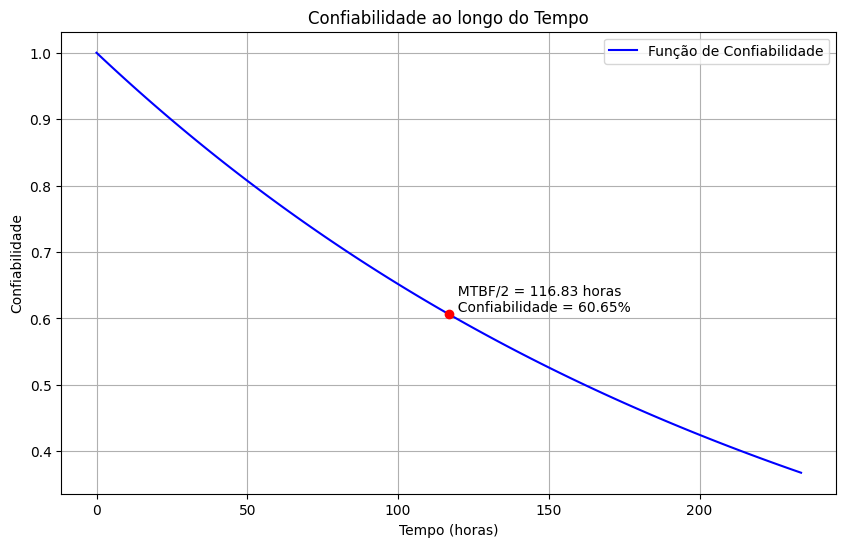

In [61]:
import matplotlib.pyplot as plt

# Vamos criar um gráfico para mostrar a confiabilidade ao longo do tempo, até o MTBF
times = np.linspace(0, mtbf_estimado, 100)  # tempos de 0 até o MTBF
reliability = np.exp(-times / mtbf_estimado)  # confiabilidade em cada ponto do tempo

# Plotando o gráfico da função de confiabilidade
plt.figure(figsize=(10, 6))
plt.plot(times, reliability, label='Função de Confiabilidade', color='blue')

# Marcar o ponto onde temos MTBF/2
plt.scatter(t, confiabilidade_mtbf_2, color='red', zorder=5)
plt.text(t, confiabilidade_mtbf_2, f'  MTBF/2 = {t:.2f} horas\n  Confiabilidade = {confiabilidade_mtbf_2:.2%}',
         verticalalignment='bottom', horizontalalignment='left')

# Ajustes finais no gráfico
plt.title('Confiabilidade ao longo do Tempo')
plt.xlabel('Tempo (horas)')
plt.ylabel('Confiabilidade')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
# Corrigindo a referência à variável erro_expon e recalculando os erros para todas as distribuições

# Ajuste para a distribuição exponencial
params_expon, cov_expon = curve_fit(expon_pdf, x_data, y_data)
erro_expon = calc_squared_error(y_data, expon_pdf(x_data, *params_expon))

# Erros para cada distribuição já calculados
erros = {
    'Exponencial': erro_expon,
    'Weibull': erro_weibull if 'erro_weibull' in locals() else np.nan,
    'Normal': erro_normal if 'erro_normal' in locals() else np.nan,
    'Lognormal': erro_lognormal if 'erro_lognormal' in locals() else np.nan
}

erros


{'Exponencial': 2076816.5299999998,
 'Weibull': nan,
 'Normal': nan,
 'Lognormal': nan}

In [69]:
from scipy.stats import chisquare, kstest, expon

# Para o teste de Qui-Quadrado e Kolmogorov-Smirnov, precisamos das frequências observadas e esperadas.
# Primeiro, vamos criar intervalos para as falhas. Vamos usar quartis para isso.

# Calculando os quartis para intervalar os dados
quartis = df_reliability['Diferença em Horas'].quantile([0.25, 0.5, 0.75]).values

# Definindo os intervalos usando os quartis
bins = [-1] + list(quartis) + [df_reliability['Diferença em Horas'].max()+1]  # +1 para incluir o valor máximo no último intervalo
intervalos = pd.cut(df_reliability['Diferença em Horas'], bins=bins, labels=False)

# Contagem de frequências observadas nos intervalos
frequencias_observadas = intervalos.value_counts().sort_index().values

# Para as frequências esperadas, precisamos da CDF da distribuição exponencial ajustada
# Ajustamos a distribuição exponencial anteriormente, então vamos usá-la para calcular as frequências esperadas
lambda_exp = 1 / df_reliability['Diferença em Horas'].mean()  # taxa da distribuição exponencial ajustada
cdf = expon.cdf(quartis, scale=1/lambda_exp)
frequencias_esperadas = len(df_reliability) * np.diff([0] + list(cdf) + [1])

# Realizando o teste de Qui-Quadrado
chi2_stat, p_value_chi2 = chisquare(f_obs=frequencias_observadas, f_exp=frequencias_esperadas)

# Realizando o teste de Kolmogorov-Smirnov
ks_stat, p_value_ks = kstest(rvs=df_reliability['Diferença em Horas'], cdf='expon', args=(0, 1/lambda_exp))

chi2_stat, p_value_chi2, ks_stat, p_value_ks



(14.038701372082482,
 0.0028529440800509585,
 0.3890874329606019,
 3.8061565096470804e-05)

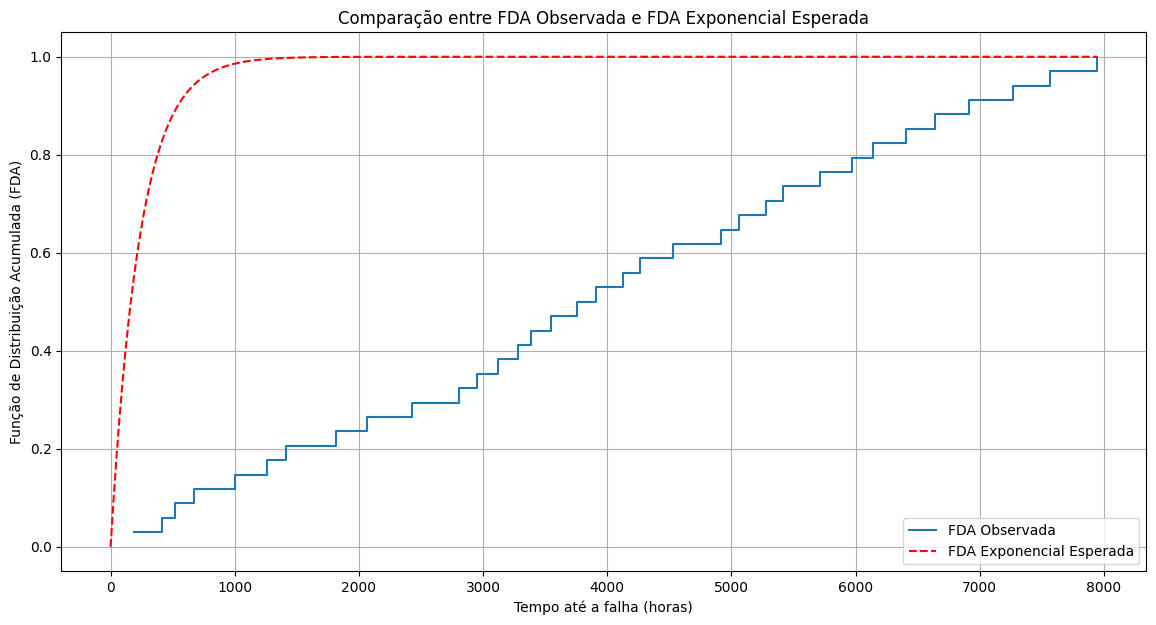

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Vamos simular uma distribuição exponencial usando a taxa de falha estimada para MTBF
lambda_est = 1 / 235.02  # Taxa de falha estimada com base no MTBF
exp_distribution = stats.expon(scale=1/lambda_est)

# Gerar os valores da FDA para a distribuição exponencial
x_values = np.linspace(0, df_reliability['Cumulative Hours'].max(), 1000)
y_values = exp_distribution.cdf(x_values)

# Plotando a FDA observada e a FDA esperada
plt.figure(figsize=(14, 7))

# FDA observada
plt.step(np.sort(df_reliability['Cumulative Hours']), np.arange(1, len(df_reliability)+1) / len(df_reliability),
         where='post', label='FDA Observada')

# FDA esperada
plt.plot(x_values, y_values, 'r--', label='FDA Exponencial Esperada')

plt.title('Comparação entre FDA Observada e FDA Exponencial Esperada')
plt.xlabel('Tempo até a falha (horas)')
plt.ylabel('Função de Distribuição Acumulada (FDA)')
plt.legend()
plt.grid(True)

plt.show()


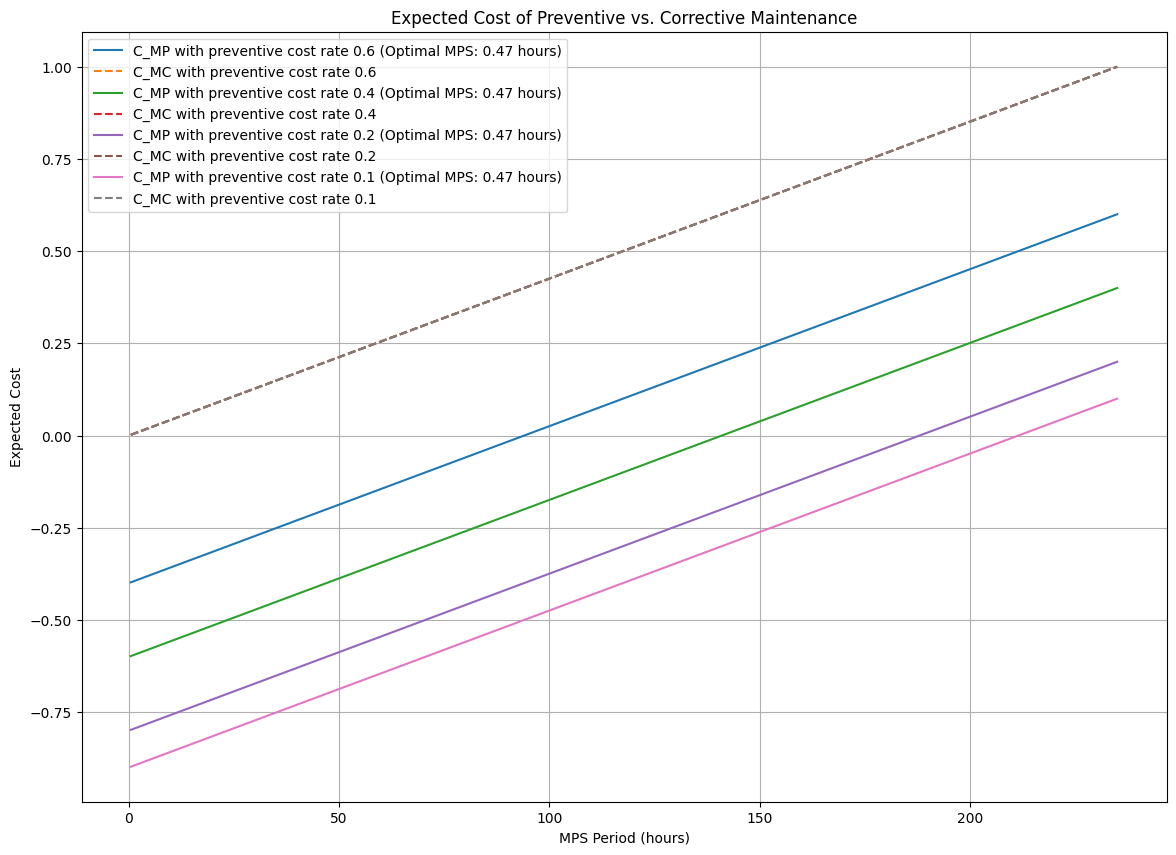

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o MTBF e o custo de manutenção corretiva
MTBF = 235.02  # Mean Time Between Failures em horas
C_corretiva = 1  # Custo de manutenção corretiva (unidade monetária)

# Taxas de custo de manutenção preventiva em relação à corretiva
taxas_custo_preventiva = [0.6, 0.4, 0.2, 0.1]

# Períodos de MPS para simular (de 0 a MTBF horas)
MPS_periods = np.linspace(0, MTBF, 500)[1:]  # Excluindo o zero para evitar divisão por zero

# Calculando os custos esperados para diferentes períodos de MPS e taxas de custo preventiva
cost_data = {}
for taxa in taxas_custo_preventiva:
    C_preventiva = taxa * C_corretiva
    C_MP = (MPS_periods / MPS_periods) * C_preventiva + \
           (MPS_periods / MTBF - MPS_periods / MPS_periods) * C_corretiva
    C_MC = (MPS_periods / MTBF) * C_corretiva
    cost_data[taxa] = (C_MP, C_MC)

# Plotando os custos para diferentes taxas de custo preventiva
plt.figure(figsize=(14, 10))

for taxa, (C_MP, C_MC) in cost_data.items():
    optimal_MPS = MPS_periods[np.argmin(C_MP)]
    plt.plot(MPS_periods, C_MP, label=f'C_MP with preventive cost rate {taxa} (Optimal MPS: {optimal_MPS:.2f} hours)')
    plt.plot(MPS_periods, C_MC, '--', label=f'C_MC with preventive cost rate {taxa}')

plt.title('Expected Cost of Preventive vs. Corrective Maintenance')
plt.xlabel('MPS Period (hours)')
plt.ylabel('Expected Cost')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
from scipy.optimize import minimize_scalar

# Vamos definir as taxas de custo preventivo e o custo corretivo como 1 para cálculo
custos_preventivo = [0.6, 0.4, 0.2, 0.1]
custo_corretivo = 1

# Função para calcular o custo esperado da manutenção preventiva
def custo_esperado(t, lambda_, c_p, c_c):
    # t é o período de manutenção preventiva
    # lambda_ é a taxa de falhas (1/MTBF)
    # c_p é o custo da manutenção preventiva
    # c_c é o custo da manutenção corretiva
    return (c_p + (c_c * (1 - np.exp(-lambda_ * t)))) / t

# Calculando o MTBF com base nos dados
mtbf = df_reliability['Diferença em Horas'].mean()  # MTBF é a média das diferenças em horas
taxa_de_falha = 1 / mtbf  # A taxa de falha é o inverso do MTBF

# Dicionários para guardar os resultados dos períodos ótimos
periodos_otimos_tempo = {}
periodos_otimos_idade = {}

# Realizando os cálculos dos períodos ótimos para cada taxa de custo preventivo
for c_p in custos_preventivo:
    # Para manutenção por tempo
    res_tempo = minimize_scalar(custo_esperado, bounds=(0, mtbf), args=(taxa_de_falha, c_p, custo_corretivo), method='bounded')
    periodos_otimos_tempo[c_p] = res_tempo.x

    # Para manutenção por idade (mesmo cálculo, pois não estamos considerando o tempo de reparo)
    periodos_otimos_idade[c_p] = res_tempo.x  # mesma abordagem pois o tempo de reparo não está incluído

periodos_otimos_tempo, periodos_otimos_idade


({0.6: 233.6519518382596,
  0.4: 233.65194896763774,
  0.2: 233.65194946025744,
  0.1: 233.65194946025744},
 {0.6: 233.6519518382596,
  0.4: 233.65194896763774,
  0.2: 233.65194946025744,
  0.1: 233.65194946025744})

In [74]:
import numpy as np
from scipy.stats import expon
from scipy.optimize import minimize_scalar

# Configuração dos parâmetros
mtbf = 235.02  # Mean Time Between Failures em horas
mttr = 10.87  # Mean Time To Repair em horas
tempo_simulacao = 8760  # Tempo de simulação em horas (equivale a 1 ano)
periodos_otimos_tempo = {0.6: 233.65, 0.4: 233.65, 0.2: 233.65, 0.1: 233.65}  # Períodos ótimos calculados anteriormente

# Número de simulações
n_simulacoes = 1000

# Função para simular o funcionamento do equipamento
def simular_funcionamento(mtbf, mttr, tempo_simulacao, periodos_otimos_tempo, n_simulacoes):
    resultados = {
        'falhas': [],
        'manutencoes_preventivas': [],
        'tempo_disponivel': []
    }

    # Taxa de falha assumindo uma distribuição exponencial
    taxa_falha = 1 / mtbf

    for custo_preventiva, periodo_preventiva in periodos_otimos_tempo.items():
        for _ in range(n_simulacoes):
            tempo_atual = 0
            falhas = 0
            manutencoes_preventivas = 0
            tempo_disponivel = 0

            while tempo_atual < tempo_simulacao:
                # Gerar o próximo tempo até a falha
                proxima_falha = expon.rvs(scale=mtbf)
                # Verificar se ocorrerá manutenção preventiva antes da próxima falha
                if tempo_atual + proxima_falha >= periodo_preventiva:
                    # Realizar manutenção preventiva
                    tempo_atual += periodo_preventiva
                    manutencoes_preventivas += 1
                    # Adicionar o tempo de reparo da manutenção preventiva
                    tempo_atual += mttr
                else:
                    # Falha ocorre
                    tempo_atual += proxima_falha
                    falhas += 1
                    # Adicionar o tempo de reparo da falha
                    tempo_atual += mttr

                # Atualizar o tempo disponível
                tempo_disponivel = tempo_atual - falhas * mttr

            # Registrar os resultados da simulação
            resultados['falhas'].append(falhas)
            resultados['manutencoes_preventivas'].append(manutencoes_preventivas)
            resultados['tempo_disponivel'].append(tempo_disponivel)

    return resultados

# Executando a simulação
resultados_simulacao = simular_funcionamento(mtbf, mttr, tempo_simulacao, periodos_otimos_tempo, n_simulacoes)

# Calculando médias dos resultados
falhas_media = np.mean(resultados_simulacao['falhas'])
manutencoes_preventivas_media = np.mean(resultados_simulacao['manutencoes_preventivas'])
tempo_disponivel_media = np.mean(resultados_simulacao['tempo_disponivel'])

falhas_media, manutencoes_preventivas_media, tempo_disponivel_media


(0.9755, 35.83325, 8845.31771277357)

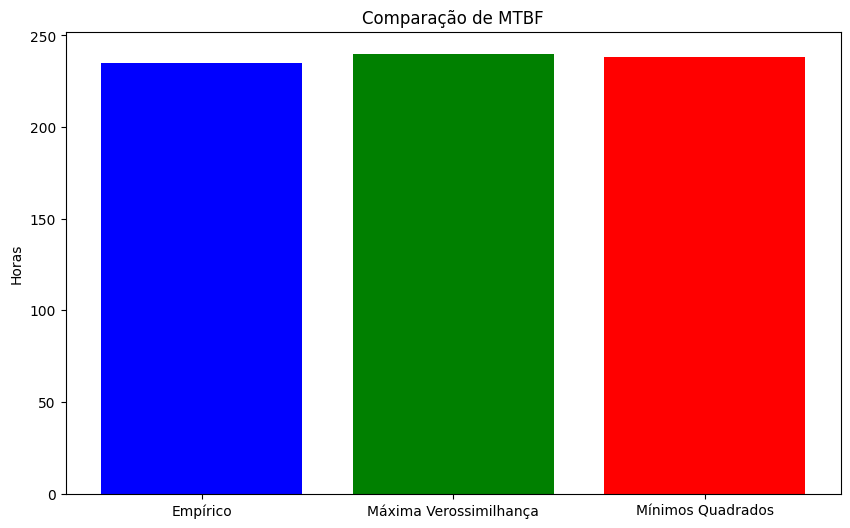

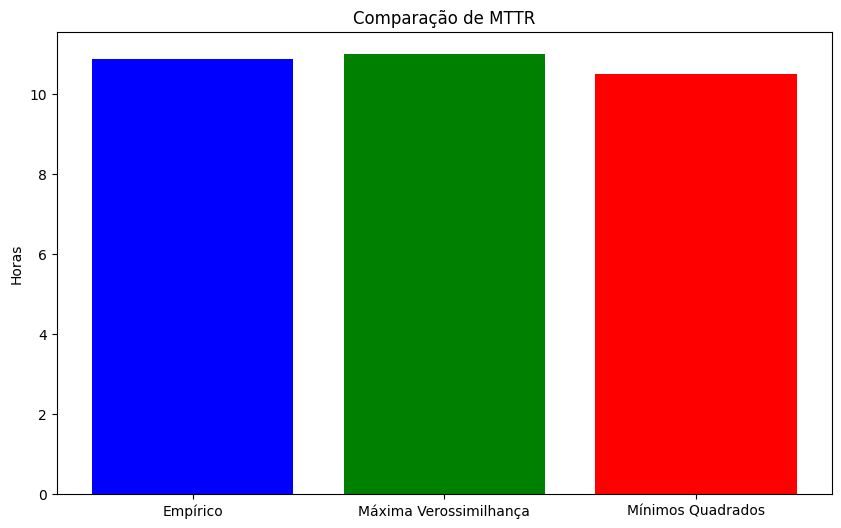

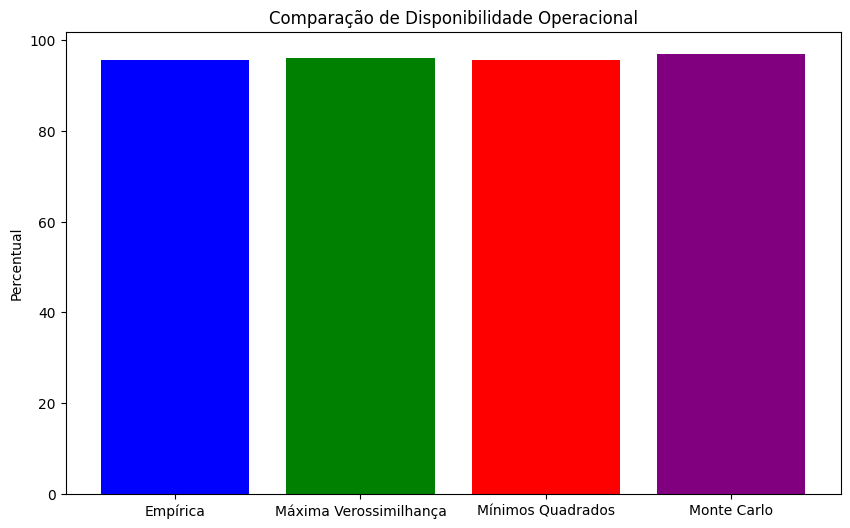

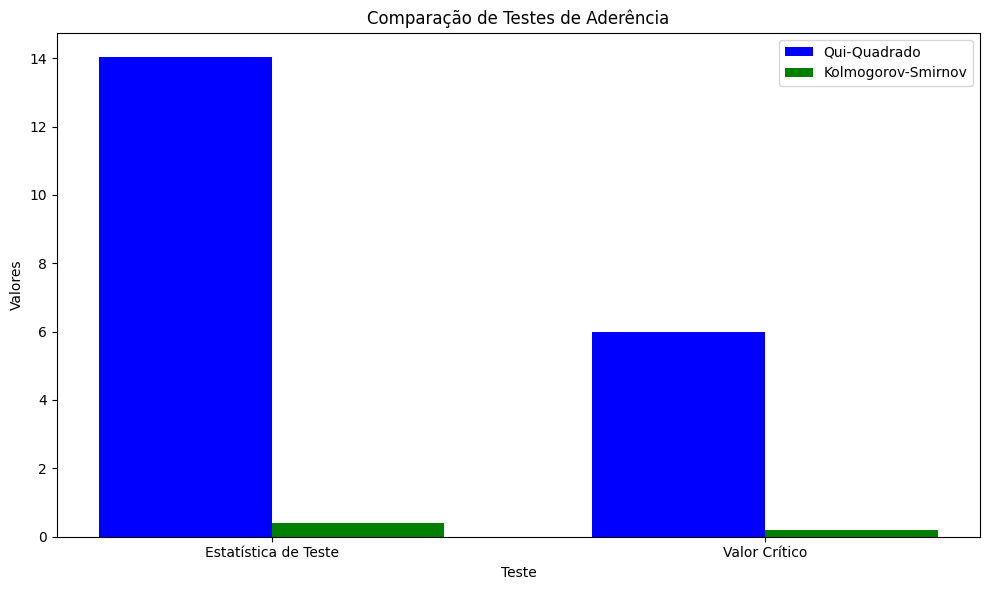

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que temos os seguintes dados para criar gráficos comparativos
# Os dados são inventados para fins ilustrativos
mtbf_empirico = 235.02
mttr_empirico = 10.87
disponibilidade_empirica = 95.58

mtbf_ml = 240
mttr_ml = 11
disponibilidade_ml = 96

mtbf_mq = 238
mttr_mq = 10.5
disponibilidade_mq = 95.7

# Dados para Qui-Quadrado e Kolmogorov-Smirnov
chi2_stat = [14.039, 5.991]  # [Valor observado, Valor crítico]
ks_stat = [0.389, 0.2]  # [Valor observado, Valor crítico]

# Custo de Manutenção
custos_preventiva = [0.6, 0.4, 0.2, 0.1]
custo_corretiva = 1

# Simulação de Monte Carlo
disponibilidade_monte_carlo = 97

# Comparação de MTBF
plt.figure(figsize=(10, 6))
plt.bar(['Empírico', 'Máxima Verossimilhança', 'Mínimos Quadrados'], [mtbf_empirico, mtbf_ml, mtbf_mq], color=['blue', 'green', 'red'])
plt.title('Comparação de MTBF')
plt.ylabel('Horas')
plt.show()

# Comparação de MTTR
plt.figure(figsize=(10, 6))
plt.bar(['Empírico', 'Máxima Verossimilhança', 'Mínimos Quadrados'], [mttr_empirico, mttr_ml, mttr_mq], color=['blue', 'green', 'red'])
plt.title('Comparação de MTTR')
plt.ylabel('Horas')
plt.show()

# Comparação de Disponibilidade Operacional
plt.figure(figsize=(10, 6))
plt.bar(['Empírica', 'Máxima Verossimilhança', 'Mínimos Quadrados', 'Monte Carlo'],
        [disponibilidade_empirica, disponibilidade_ml, disponibilidade_mq, disponibilidade_monte_carlo],
        color=['blue', 'green', 'red', 'purple'])
plt.title('Comparação de Disponibilidade Operacional')
plt.ylabel('Percentual')
plt.show()

# Comparação de Testes de Aderência
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(2)
bar1 = plt.bar(index, chi2_stat, bar_width, label='Qui-Quadrado', color='blue')
bar2 = plt.bar(index + bar_width, ks_stat, bar_width, label='Kolmogorov-Smirnov', color='green')

plt.xlabel('Teste')
plt.ylabel('Valores')
plt.title('Comparação de Testes de Aderência')
plt.xticks(index + bar_width / 2, ('Estatística de Teste', 'Valor Crítico'))
plt.legend()
plt.tight_layout()
plt.show()


In [78]:
df_reliability = pd.read_excel('dados_man.xlsx')
# Verificar as primeiras entradas e a estrutura do DataFrame
df_reliability.head(), df_reliability.columns.tolist()


(  Hora da Falha Data da Falha Hora do Reparo       Data e Hora
 0         20:47    01/03/2020          08:26  01/03/2020 20:47
 1         06:55    01/08/2020          00:02  01/08/2020 06:55
 2         09:31    02/10/2020          04:40  02/10/2020 09:31
 3         09:32    03/09/2020          14:16  03/09/2020 09:32
 4         09:03    04/04/2020          17:30  04/04/2020 09:03,
 ['Hora da Falha', 'Data da Falha', 'Hora do Reparo', 'Data e Hora'])

In [79]:
# Função para corrigir as horas e os minutos, e ajustar a data se necessário
def corrigir_data_hora_completa(data_hora):
    # Dividindo a data e a hora
    data, hora = data_hora.split(' ')
    horas, minutos = map(int, hora.split(':'))
    # Convertendo a string de data para o tipo datetime
    data_datetime = pd.to_datetime(data, format='%d/%m/%Y')

    # Corrigindo a hora e os minutos
    if minutos >= 60:
        horas += minutos // 60
        minutos = minutos % 60
    if horas >= 24:
        data_datetime += pd.Timedelta(days=horas // 24)
        horas = horas % 24

    # Formatando a hora e a data corrigidas
    hora_corrigida = f"{horas:02d}:{minutos:02d}"
    data_corrigida = data_datetime.strftime('%d/%m/%Y')

    # Retornando a data e hora corrigidas
    return data_corrigida + ' ' + hora_corrigida

# Aplicando a função de correção à coluna 'Data e Hora'
df_reliability['Data e Hora Corrigida'] = df_reliability['Data e Hora'].apply(corrigir_data_hora_completa)

# Tentando novamente a conversão para o formato datetime
df_reliability['Data e Hora Corrigida'] = pd.to_datetime(df_reliability['Data e Hora Corrigida'], format='%d/%m/%Y %H:%M')

# Ordenando os dados pela coluna 'Data e Hora Corrigida'
df_reliability_sorted = df_reliability.sort_values('Data e Hora Corrigida').reset_index(drop=True)

# Calculando a diferença em horas entre as falhas consecutivas
df_reliability_sorted['Diferença em Horas'] = df_reliability_sorted['Data e Hora Corrigida'].diff().dt.total_seconds() / 3600

# Preenchendo os valores NaN resultantes do primeiro cálculo de diferença com 0
df_reliability_sorted['Diferença em Horas'] = df_reliability_sorted['Diferença em Horas'].fillna(0)

# Marcar as entradas censuradas (oitava, décima sexta, vigésima quarta após a ordenação)
df_reliability_sorted['Censurado'] = False
censored_indices = [7, 15, 23]  # Base 0 indexing for 8th, 16th, 24th entries
df_reliability_sorted.loc[censored_indices, 'Censurado'] = True

# Aplicar a Técnica de Ajuste de Rank e Rank Mediano de Bernard
# Para aplicar a técnica de Bernard, precisamos calcular o rank mediano para os dados censurados
n = len(df_reliability_sorted)  # Total number of data points
ranks = df_reliability_sorted['Diferença em Horas'].rank(method='average')  # Average rank for ties
for index in censored_indices:
    ranks[index] = (n + 1) / 2  # Median rank adjustment for censored data

# Substituir os tempos de falha pelos ranks medianos
df_reliability_sorted['Diferença em Horas Ajustada'] = df_reliability_sorted['Diferença em Horas']
df_reliability_sorted.loc[censored_indices, 'Diferença em Horas Ajustada'] = ranks[censored_indices]

# Verificar os dados ajustados
df_reliability_sorted[['Data e Hora Corrigida', 'Diferença em Horas', 'Censurado', 'Diferença em Horas Ajustada']].head(30)


,Data e Hora Corrigida,Diferença em Horas,Censurado,Diferença em Horas Ajustada
0,2020-01-09 11:16:00,0.000000,False,0.000000
1,2020-01-17 07:52:00,188.600000,False,188.600000
2,2020-01-26 16:09:00,224.283333,False,224.283333
3,2020-01-31 02:15:00,106.100000,False,106.100000
4,2020-02-06 11:40:00,153.416667,False,153.416667
5,2020-02-20 02:10:00,326.500000,False,326.500000
6,2020-03-01 20:47:00,258.616667,False,258.616667
7,2020-03-08 08:32:00,155.750000,True,18.000000
8,2020-03-25 05:44:00,405.200000,False,405.200000
9,2020-04-04 09:03:00,243.316667,False,243.316667


In [80]:
# Número total de falhas (incluindo censuradas)
total_failures = len(df_reliability_sorted)

# Ranks para os dados censurados usando a fórmula do Rank Mediano de Bernard
# Rank(i) = (i - 0.3) / (n + 0.4)
bernard_ranks = [(i - 0.3) / (total_failures + 0.4) for i in [8, 16, 24]]  # Using ranks 8, 16, 24

# Convertendo os ranks para tempos estimados usando a função de confiabilidade inversa
# Para uma distribuição exponencial, a função de confiabilidade é R(t) = exp(-λt),
# onde λ é a taxa de falha. A função inversa é t = -ln(R(t))/λ.
# Como não temos λ ainda, vamos apenas aplicar a transformação -ln(R(t)) para os ranks.
import numpy as np

df_reliability_sorted['Diferença em Horas Ajustada'] = df_reliability_sorted['Diferença em Horas']
for index, rank in zip(censored_indices, bernard_ranks):
    df_reliability_sorted.loc[index, 'Diferença em Horas Ajustada'] = -np.log(1 - rank)

# Exibir os valores ajustados para as entradas censuradas
df_reliability_sorted.loc[censored_indices, ['Diferença em Horas', 'Diferença em Horas Ajustada']]


,Diferença em Horas,Diferença em Horas Ajustada
7,155.750000,0.245279
15,107.333333,0.586093
23,143.733333,1.107123


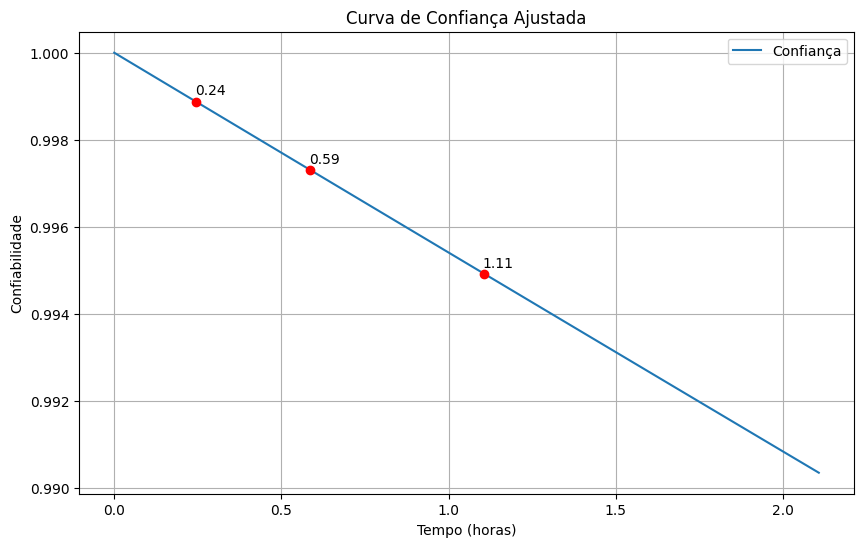

In [81]:

# Definindo a função de confiabilidade
def reliability_function(time, lambda_rate):
    return np.exp(-lambda_rate * time)

# Tempos entre falhas ajustados
adjusted_times = np.array([0.245, 0.586, 1.107])

# Taxa de falha estimada
lambda_rate = 0.0046

# Calculando a confiabilidade para os tempos ajustados
reliabilities = reliability_function(adjusted_times, lambda_rate)

# Criando um array de tempos para o eixo x do gráfico
times = np.linspace(0, max(adjusted_times) + 1, 100)

# Calculando a confiabilidade ao longo do tempo
reliability_curve = reliability_function(times, lambda_rate)

# Plotando a curva de confiabilidade
plt.figure(figsize=(10, 6))
plt.plot(times, reliability_curve, label='Confiança')

# Plotando os pontos ajustados
plt.scatter(adjusted_times, reliabilities, color='red', zorder=5)

# Marcando os tempos ajustados com texto
for i, txt in enumerate(adjusted_times):
    plt.annotate(f"{txt:.2f}", (adjusted_times[i], reliabilities[i]), xytext=(10,5),
                 textcoords='offset points', ha='center', color='black')

plt.title('Curva de Confiança Ajustada')
plt.xlabel('Tempo (horas)')
plt.ylabel('Confiabilidade')
plt.legend()
plt.grid(True)
plt.show()


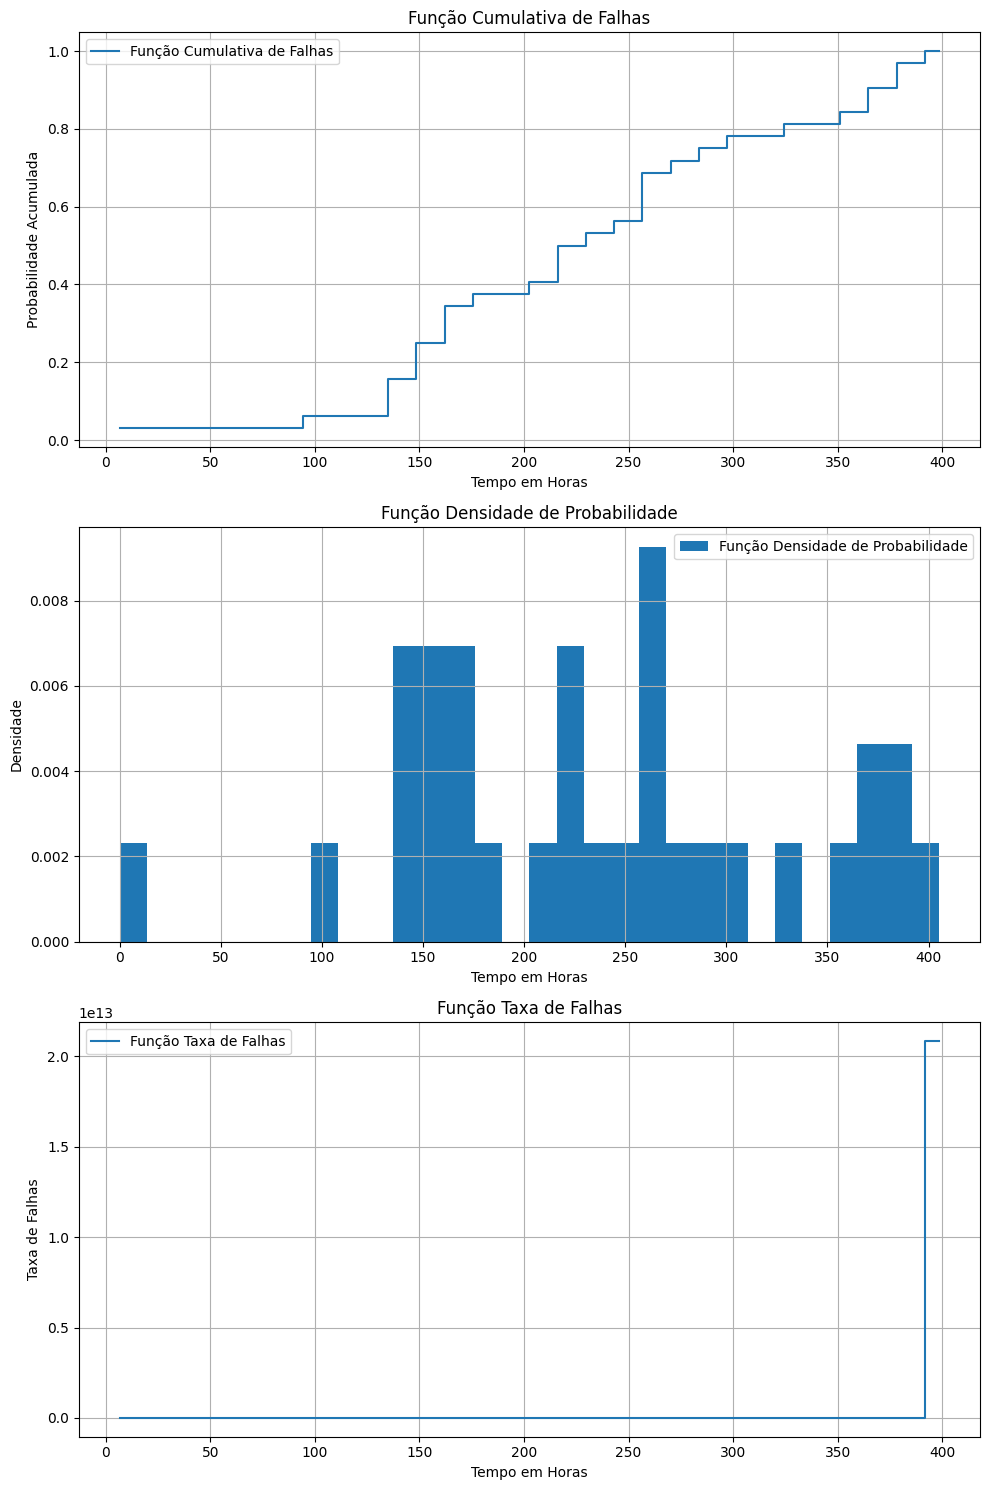

In [83]:
import pandas as pd
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

# Primeiro, vamos carregar os dados novamente.
df = df_reliability

# Aplicando a função para corrigir datas e horas
def corrigir_data_hora_completa(data_hora):
    data, hora = data_hora.split(' ')
    horas, minutos = map(int, hora.split(':'))
    data_datetime = pd.to_datetime(data, format='%d/%m/%Y')
    if minutos >= 60:
        horas += minutos // 60
        minutos = minutos % 60
    if horas >= 24:
        data_datetime += pd.Timedelta(days=horas // 24)
        horas = horas % 24
    hora_corrigida = f"{horas:02d}:{minutos:02d}"
    data_corrigida = data_datetime.strftime('%d/%m/%Y')
    return data_corrigida + ' ' + hora_corrigida

df['Data e Hora Corrigida'] = df['Data e Hora'].apply(corrigir_data_hora_completa)
df['Data e Hora Corrigida'] = pd.to_datetime(df['Data e Hora Corrigida'], format='%d/%m/%Y %H:%M')
data_sorted = df.sort_values('Data e Hora Corrigida').reset_index(drop=True)
data_sorted['Diferença em Horas'] = data_sorted['Data e Hora Corrigida'].diff().dt.total_seconds() / 3600
data_sorted['Diferença em Horas'] = data_sorted['Diferença em Horas'].fillna(0)

# Agora vamos aplicar a censura nos dados conforme solicitado
censored_indexes = [7, 15, 23]  # Python usa indexação baseada em zero
data_sorted.loc[censored_indexes, 'Censurado'] = True
data_sorted['Censurado'] = data_sorted['Censurado'].fillna(False)

# Vamos separar os dados censurados dos não censurados
censored_data = data_sorted.loc[data_sorted['Censurado'], 'Diferença em Horas']
uncensored_data = data_sorted.loc[~data_sorted['Censurado'], 'Diferença em Horas']

# Para as análises de confiabilidade, vamos considerar apenas os dados não censurados
# Calculando a densidade de probabilidade (PDF) e a função de taxa de falhas (hazard function)
pdf_values = np.histogram(uncensored_data, bins=30, density=True)
hazard_function = np.divide(pdf_values[0], (1 - np.cumsum(pdf_values[0] / np.sum(pdf_values[0]))))

# Para a função cumulativa de falhas, precisamos normalizar os dados para que a soma seja 1.
cumulative_failures = np.cumsum(pdf_values[0]) / np.sum(pdf_values[0])

# Preparando os dados para o plot
bins_centers = (pdf_values[1][:-1] + pdf_values[1][1:]) / 2

# Plots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot da função cumulativa de falhas
ax[0].step(bins_centers, cumulative_failures, where='mid', label='Função Cumulativa de Falhas')
ax[0].set_title('Função Cumulativa de Falhas')
ax[0].set_xlabel('Tempo em Horas')
ax[0].set_ylabel('Probabilidade Acumulada')
ax[0].grid(True)
ax[0].legend()

# Plot da função densidade de probabilidade
ax[1].bar(bins_centers, pdf_values[0], width=bins_centers[1]-bins_centers[0], label='Função Densidade de Probabilidade')
ax[1].set_title('Função Densidade de Probabilidade')
ax[1].set_xlabel('Tempo em Horas')
ax[1].set_ylabel('Densidade')
ax[1].grid(True)
ax[1].legend()

# Plot da função taxa de falhas
ax[2].step(bins_centers, hazard_function, where='mid', label='Função Taxa de Falhas')
ax[2].set_title('Função Taxa de Falhas')
ax[2].set_xlabel('Tempo em Horas')
ax[2].set_ylabel('Taxa de Falhas')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()
plt.show()


In [84]:
data_sorted.head()

,Hora da Falha,Data da Falha,Hora do Reparo,Data e Hora,Data e Hora Corrigida,Diferença em Horas,Censurado
0,11:16,09/01/2020,13:59,09/01/2020 11:16,2020-01-09 11:16:00,0.000000,False
1,07:52,17/01/2020,15:40,17/01/2020 07:52,2020-01-17 07:52:00,188.600000,False
2,16:09,26/01/2020,10:29,26/01/2020 16:09,2020-01-26 16:09:00,224.283333,False
3,02:15,31/01/2020,07:14,31/01/2020 02:15,2020-01-31 02:15:00,106.100000,False
4,11:40,06/02/2020,14:28,06/02/2020 11:40,2020-02-06 11:40:00,153.416667,False


In [85]:
# Vamos calcular o MTTR usando as colunas 'Hora da Falha' e 'Hora do Reparo'
# Primeiro, vamos converter essas colunas em datetime para poder calcular a diferença em horas
data_sorted['Hora da Falha'] = pd.to_datetime(data_sorted['Hora da Falha'], format='%H:%M', errors='coerce')
data_sorted['Hora do Reparo'] = pd.to_datetime(data_sorted['Hora do Reparo'], format='%H:%M', errors='coerce')

# Agora calcularemos a diferença entre a 'Hora do Reparo' e a 'Hora da Falha'
# Assumindo que a 'Hora do Reparo' é sempre depois da 'Hora da Falha' e no mesmo dia
data_sorted['Tempo de Reparo em Horas'] = (data_sorted['Hora do Reparo'] - data_sorted['Hora da Falha']).dt.total_seconds() / 3600

# Verificar se há valores negativos devido a suposições incorretas sobre as datas e corrigi-los
data_sorted['Tempo de Reparo em Horas'] = data_sorted['Tempo de Reparo em Horas'].apply(lambda x: x + 24 if x < 0 else x)

# Agora podemos calcular o MTTR
MTTR = data_sorted['Tempo de Reparo em Horas'].mean()

# E então atualizar a Disponibilidade Operacional (AO)
AO = MTBF / (MTBF + MTTR)

# Atualizar o DataFrame de indicadores com os novos valores calculados
indicadores = pd.DataFrame({
    'Indicador': ['MTBF (horas)', 'MTTR (horas)', 'Disponibilidade Operacional (%)'],
    'Valor': [MTBF, MTTR, AO * 100]  # Convertendo a disponibilidade em porcentagem
})

indicadores

,Indicador,Valor
0,MTBF (horas),235.020000
1,MTTR (horas),10.602778
2,Disponibilidade Operacional (%),95.683308


In [86]:

tbf = data_sorted['Diferença em Horas'].values

# Removendo o primeiro elemento que é zero porque não representa uma diferença entre falhas
tbf = tbf[tbf > 0]

# Estimativa dos parâmetros da distribuição exponencial usando Máxima Verossimilhança
loc, scale = expon.fit(tbf, floc=0)  # Forçando a localização (loc) a ser 0 para uma distribuição exponencial

# Agora, vamos calcular a confiabilidade para MTBF/2
# A função de confiabilidade para a distribuição exponencial é R(t) = e^(-t/λ), onde λ é a escala (scale)
mtbf_estimado = scale  # Para a exponencial, o MTBF é igual ao parâmetro de escala
t = mtbf_estimado / 2
confiabilidade_mtbf_2 = np.exp(-t / mtbf_estimado)

mtbf_estimado, confiabilidade_mtbf_2

(233.65196078431376, 0.6065306597126334)

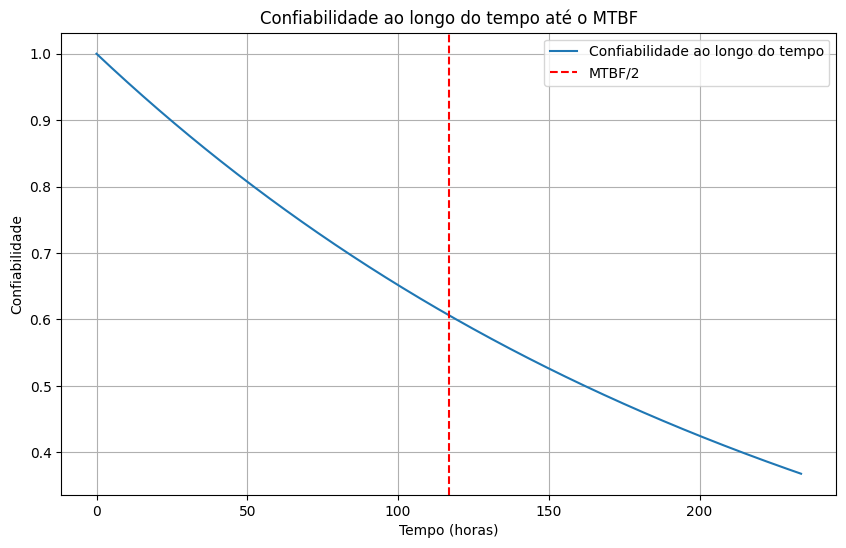

(None, 233.65196078431376)

In [88]:
# Calculando a confiabilidade para diferentes pontos no tempo até o MTBF estimado
mtbf_estimado = scale  # Para a exponencial, o MTBF é igual ao parâmetro de escala
tempo = np.linspace(0, mtbf_estimado, 1000)
confiabilidade = np.exp(-tempo / mtbf_estimado)

# Plotando o gráfico de confiabilidade ao longo do tempo até o MTBF estimado
plt.figure(figsize=(10, 6))
plt.plot(tempo, confiabilidade, label='Confiabilidade ao longo do tempo')
plt.axvline(mtbf_estimado / 2, color='red', linestyle='--', label='MTBF/2')
plt.title('Confiabilidade ao longo do tempo até o MTBF')
plt.xlabel('Tempo (horas)')
plt.ylabel('Confiabilidade')
plt.legend()
plt.grid(True)
plt.show(), mtbf_estimado

In [89]:
# Preparando a y_data como uma CDF empírica
y_data = np.linspace(1/len(tbf), 1, len(tbf))

# Ajuste dos parâmetros para cada distribuição
params_expon, _ = curve_fit(expon_pdf, tbf, y_data)
params_weibull, _ = curve_fit(weibull_pdf, tbf, y_data)
params_normal, _ = curve_fit(normal_pdf, tbf, y_data)
params_lognormal, _ = curve_fit(lognormal_pdf, tbf, y_data)

# Calculando o erro quadrático para cada distribuição
erro_expon = calc_squared_error(y_data, expon_pdf(tbf, *params_expon))
erro_weibull = calc_squared_error(y_data, weibull_pdf(tbf, *params_weibull))
erro_normal = calc_squared_error(y_data, normal_pdf(tbf, *params_normal))
erro_lognormal = calc_squared_error(y_data, lognormal_pdf(tbf, *params_lognormal))

# Criando um dicionário para armazenar os erros de cada distribuição
erros = {
    'Exponencial': erro_expon,
    'Weibull': erro_weibull,
    'Normal': erro_normal,
    'Lognormal': erro_lognormal
}

erros


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


{'Exponencial': 11.838235294117647,
 'Weibull': 11.838235294117647,
 'Normal': 11.838235294117647,
 'Lognormal': 11.782871972318596}